# The building blocks

In this course we will be mainly concerned with the study of many-body quantum systems, systems made by many copies of individual consituentes.  Say e.g. spins $s=\frac{1}{2}$. 

## Single spin
In this specific case the states of a single constituent span a two dimensional complex Hilbert space. We can thus use a vector with two complex components
$|\phi\rangle = c_0 |0\rangle + c_1 |1\rangle$


### E1 Random state
Write a python code that uses the numpy random generator in order to create a random state of a spin one half. Store it as a column vector.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
c_0 =np.random.rand()+1j*np.random.rand()
c_1 =np.random.rand()+1j*np.random.rand()
phi = np.array([[c_0],[c_1]])
print(phi)

[[0.02307579+0.72721495j]
 [0.75730534+0.16275262j]]


### E2 Normalize your state
In QM states are usually normalized, normalize the state you have created previously:
$\langle \phi|\phi\rangle =1$

(*Hint: use the numpy linalg norm function*) https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

In [2]:
import scipy.linalg as LA
phi_norm = LA.norm(phi)
print(phi_norm)
phi = phi/phi_norm
print(LA.norm(phi))

1.2941852521352841
1.0


## Defining operators 
Once we have a state we can compute expectation value of operators. Remember operators need to be Hermitian. 
All Hermitian operators can be written as linear combinations of the basis of Hermitian operators. For a single spin 1/2 there are 4 operators in the basis $ 1\equiv \sigma_0, \sigma_x \equiv \sigma_1, \sigma_y \equiv \sigma_2, \sigma_z \equiv \sigma_3$.
They satisfy the algebra
$\sigma_i \sigma_j = \delta_{ij}+i \epsilon_{ijk}\sigma_k$

with $\epsilon_{ijk}$ the completely antisymmetric tensor with $\epsilon_{012}=1$
(In this notation summation over repeated indices is implied, called Einstein notation)



In [3]:
identity = np.eye(2)
sigma_x = np.array([[0.,1.],[1.,0.]])
sigma_y = np.array([[0.,-1.j],[1.j,0.]])
sigma_z = np.array([[1.,0.],[0.,-1.]])
print(identity)
print(sigma_x)
print(sigma_y)
print(sigma_z)
print(sigma_x@sigma_y)

[[1. 0.]
 [0. 1.]]
[[0. 1.]
 [1. 0.]]
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
[[ 1.  0.]
 [ 0. -1.]]
[[0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j]]


 ### E3 Construct operators from elements of the basis
 Write an arbitrary operator linear combination of the four above four operators using four complex random   coefficients
$O = c_0 1 + c_i \sigma_i$, normalize it in such a way that 
$c_i c_i^*=1$
 

In [4]:
c = np.random.rand(4,1)
c = c/LA.norm(c)
print(LA.norm(c))
print(c)
operator =c[0]*identity + c[1]*sigma_x+c[2]*sigma_y+c[3]*sigma_z
print(operator)

1.0
[[0.64513634]
 [0.14339956]
 [0.71019608]
 [0.24260502]]
[[0.88774136+0.j         0.14339956-0.71019608j]
 [0.14339956+0.71019608j 0.40253133+0.j        ]]


### E4 Find the components in a given basis
Now from the kownledge of the operator $O$, reconstruct its components in the basis of the above operators. 

(*Hint: use the fact that Pauli operators are traceless, and they square to the identity*)

In [5]:
d =np.zeros([4,1])+1.j*np.zeros([4,1])
print(d)
d[0] = np.trace(operator)/2
d[1] = np.trace(operator@sigma_x)/2
d[2] = np.trace(operator@sigma_y)/2
d[3] = np.trace(operator@sigma_z)/2
print(d)

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]]
[[0.64513634+0.j]
 [0.14339956+0.j]
 [0.71019608+0.j]
 [0.24260502+0.j]]


### E5 Check Hermiticity of the operator
Since we are interested in observable we want the operator to be Hermitian

In [6]:
# The np.isclose() function check whether two operators are close. 
# We use that function instead of equal because is more robust. 
np.isclose(operator,operator.T.conj())

array([[ True,  True],
       [ True,  True]])

### E6 Computing expectation values

Given the state $|\phi \rangle$ and the operator $O$, compute the expectation value $\langle \phi |O|\phi \rangle$, assuming a normalized state

In [7]:
exp_O = phi.T.conj()@operator@phi
print(exp_O)

[[0.72525174-2.77555756e-17j]]


In [8]:
(operator-operator.T.conj())

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

We obtain an important result. Although the operator is Hermitian and its eigenvalues should be real we obtain a small imaginary component. This is due to the fact that we are using numerical algorithm for this work. 

### E7 Changing basis to states and operators
We can clearly change the basis to operators and states, for example we can re-express the above state and operator in the basis where $\sigma_x$ is diagonal, and the matrix element of the new operator in the new state should be the same than the old one in the old state.

In [9]:
U_x =np.array([[1,1],[1,-1]])/np.sqrt(2)
print(U_x.T@sigma_x@U_x)
phi_x =U_x.T@phi
operator_x = U_x.T@operator@U_x
print(phi_x.T.conj()@operator_x@phi_x)

[[ 1.  0.]
 [ 0. -1.]]
[[0.72525174+0.j]]


## Two spins

Here we have two different types of random states. A random state of two spins built from the random state of a single spin $|\phi \phi\rangle =| \phi\rangle \otimes  |\phi\rangle$, construct it below (*Hint: use the np.kron() function)

In [10]:
c_0 =np.random.rand()+1j*np.random.rand()
c_1 =np.random.rand()+1j*np.random.rand()
phi_2 = np.array([[c_0],[c_1]])
phi_2= phi_2/LA.norm(phi_2)
phi_phi=np.kron(phi,phi_2)
print(phi_phi)
phi_phi_norm = LA.norm(phi_phi)
print(phi_phi_norm)

[[ 0.05391666+0.71138828j]
 [-0.12134024+0.11521081j]
 [ 0.12428794+0.65071814j]
 [-0.09988335+0.1190145j ]]
1.0


Now we can compute the expectation value of different operators, for example we can compute the old operator on the first spin, and we should get the same number out $O \otimes 1$

In [11]:
operator_tensor_identity = np.kron(operator,np.eye(2))
phi_phi.T.conj()@operator_tensor_identity@phi_phi


array([[0.72525174-6.9388939e-17j]])

But we can compute the same operator on the other spin, $1 \otimes O$

In [12]:
identity_tensor_operator = np.kron(np.eye(2),operator)
phi_phi.T.conj()@identity_tensor_operator@phi_phi

array([[1.14748544+0.j]])

Or multi-spin operators $O \otimes O$ and their combinations

In [13]:
operator_tensor_operator = np.kron(operator,operator)
phi_phi.T.conj()@operator_tensor_operator@phi_phi

array([[0.83221581+1.38777878e-17j]])

### The cost of increasing the number of spins. 
We can now try to understand what is the cost of increasing the number of spins. From the computational point of view there are two kinds of cost. One is the cost of storing the state of the system in memory, typically called the *space* cost, the other is the cost entailed with performing the computation, typically called the *time* cost. 
You have learnt about these aspects in the lecture notes, here we take a pragramatic approach. 
We will first plot the cost *space* cost as a function of the number of constituents. 


Text(0, 0.5, 'Space cost')

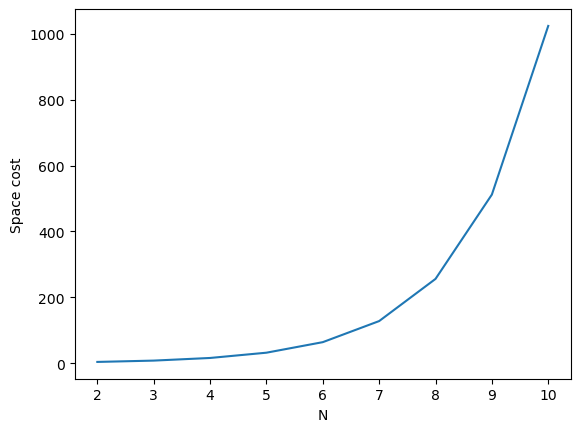

In [16]:
space_cost=[]
space_cost.append(np.size(phi_phi))
phi_n_phi =np.kron(phi_phi,phi)
space_cost.append(np.size(phi_n_phi))
i_N =[4, 5, 6, 7, 8, 9, 10]
for N in i_N:
    phi_n_phi =np.kron(phi_n_phi,phi)
    space_cost.append(np.size(phi_n_phi))

plt.plot([2,3]+i_N,space_cost)
plt.xlabel('N')
plt.ylabel('Space cost')




We crearly obtain an exponential increase in space.

We can also now compute the time it takes to compute the expectation value of a given observable


Text(0, 0.5, 'Time cost')

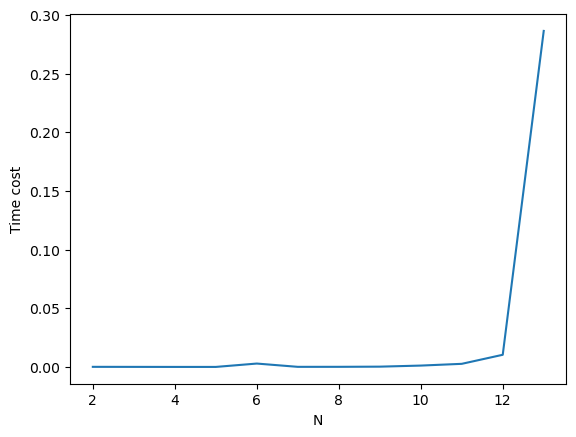

In [18]:
import time
times_to_execute=[]

operator_tensor_identity = np.kron(operator,np.eye(2))
t1=time.time()
phi_phi.T.conj()@operator_tensor_identity@phi_phi
t2=time.time()
times_to_execute.append(t2-t1)
operator_tensor_many_identities = np.kron(operator_tensor_identity,np.eye(2))
phi_n_phi =np.kron(phi_phi,phi)
t1=time.time()
phi_n_phi.T.conj()@operator_tensor_many_identities@phi_n_phi
t2=time.time()
times_to_execute.append(t2-t1)
i_N =[4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for N in i_N:
    phi_n_phi =np.kron(phi_n_phi,phi)
    operator_tensor_many_identities = np.kron(operator_tensor_many_identities,np.eye(2))
    t1=time.time()
    phi_n_phi.T.conj()@operator_tensor_many_identities@phi_n_phi
    t2=time.time()
    times_to_execute.append(t2-t1)

plt.plot([2,3]+i_N,times_to_execute)
plt.xlabel('N')
plt.ylabel('Time cost')

Another exponential increase in computational resources.

### Our first tensor network
We have not used at all the fact that the sates we are dealing with are very special, in the sense that they are product state. In order to see this we can compute the connected correlation functions, that is the value of

$\langle O_1 O_2 \rangle -\langle O_1\rangle \langle O_2\rangle$, we do it for the case of three spins, for simplicity

In [19]:
phi_phi_phi = np.kron(phi_phi,phi)
operator_tensor_identity_tensor_operator = np.kron(operator_tensor_identity,operator)
O1_O2 = phi_phi_phi.T.conj()@operator_tensor_identity_tensor_operator @phi_phi_phi

operator_tensor_identity_tensor_identiy = np.kron(operator_tensor_identity,np.eye(2))
O1 =phi_phi_phi.T.conj()@operator_tensor_identity_tensor_identiy @phi_phi_phi
identity_tensor_identity_tensor_operator =np.kron(np.eye(4),operator)
O2= phi_phi_phi.T.conj()@identity_tensor_identity_tensor_operator@phi_phi_phi

print(O1_O2-O1*O2)

[[0.00248523-5.15923606e-17j]]


as seen in the previous explicit example that value always vanishes, as a consequence of the structure of the state.
As a result
$⟨𝑂_1𝑂_2⟩=⟨𝑂_1⟩⟨𝑂_2⟩$ for product states, leading to a huge simplification. Indeed we can now compute any arbitrary correlation function or operator by just multiplying the values of local operators. Rather than explicitly building our large tensor product state, we can just keep a list of individual product states, and use it to compute expectation values.

Wrt to expectation of local operators these states always like pure state 
$\rho =|\phi\rangle\langle \phi|$,
such that local expectation values are given as expected as 
$\langle O \rangle = \textrm{tr}(\rho O) =\langle \phi |O |\phi \rangle$


## The generic multi-spin state
We also have the case of a generic random state of the two spins. How do we get it? We can evolve any initial state of the Hilbert space of the two spins under the action of a random Hamiltonian for unit time. The only request is that the Hamiltonian is Hermitian, so rather than following the ideas of the previous section we just build a random $2^N \times 2^N$ Hamiltonian, that is extensive and build the corresponding state.



2
4
6
8


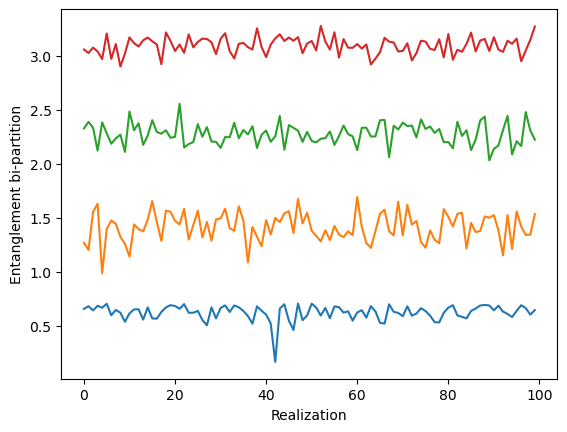

In [20]:
import matplotlib.pyplot as plt
for N in range(2,10,2):
    print(N)
    dim_h =2**N
    ent_entropies=[]
    #print(dim_h)
    for _ in range(0,100):
        init_state = np.zeros([dim_h,1])
        init_state[0]=1.
        random_h = np.array(np.random.rand(dim_h,dim_h)+1j*np.random.rand(dim_h,dim_h))
        random_h = random_h+random_h.T.conj()
        random_h = random_h/LA.norm(random_h)*N

        random_unitary =LA.expm(-1j*random_h)
        random_state=random_unitary@init_state
        #print(LA.norm(random_state))
        sqrt_reduced_density_matrix = np.reshape(random_state,[int(2**(N/2)),int(2**(N/2))])
        _, ent_spectrum,_= LA.svd(sqrt_reduced_density_matrix)
        ent_entropy = -np.dot(np.log(ent_spectrum),ent_spectrum)/np.log(2)
        ent_entropies.append(ent_entropy)
        
    plt.plot(ent_entropies)
    plt.xlabel('Realization')
    plt.ylabel('Entanglement bi-partition')